## 1) Opening files and variable assignment

In [1]:
import pandas as pd
import numpy as np
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [2]:
data_desloc = pd.read_csv('./../table_desloc_coord.csv', low_memory=False)

In [3]:
data_desloc

Unnamed: 0  legDes  depId          depCPDes   start_lat   start_lon  \
0              1      13   8550  Viana do Castelo   41.694867   -8.831088   
1              2      13   8550  Viana do Castelo   41.694867   -8.831088   
2              3      13   8550  Viana do Castelo   41.694867   -8.831088   
3              4      13   8550  Viana do Castelo   41.694867   -8.831088   
4              5      13   8550  Viana do Castelo   41.694867   -8.831088   
5              6      13   8550  Viana do Castelo   41.694867   -8.831088   
6              7      13   8357          Bragança  41.8071182  -6.7589839   
7              8      13   8478             Porto  41.1494512  -8.6107884   
8              9      13   8478             Porto  41.1494512  -8.6107884   
9             10      13   8478             Porto  41.1494512  -8.6107884   
10            11      13   8478             Porto  41.1494512  -8.6107884   
11            12      13   8478             Porto  41.1494512  -8.6107884   
12            13      13   8478             Porto  41.1494512  -8.6107884   
13            14      13   8478             Porto  41.1494512  -8.6107884   
14            15      13   8478             Porto  41.1494512  -8.6107884   
15            16      13   8478             Porto  41.1494512  -8.6107884   
16            17      13   8478             Porto  41.1494512  -8.6107884   
17            18      13   8478             Porto  41.1494512  -8.6107884   
18            19      13   8478             Porto  41.1494512  -8.6107884   
19            20      13   8478             Porto  41.1494512  -8.6107884   
20            21      13   8478             Porto  41.1494512  -8.6107884   
21            22      13   8478             Porto  41.1494512  -8.6107884   
22            23      13   8478             Porto  41.1494512  -8.6107884   
23            24      13   8478             Porto  41.1494512  -8.6107884   
24            25      13   8478             Porto  41.1494512  -8.6107884   
25            26      13   8478             Porto  41.1494512  -8.6107884   
26            27      13   8478             Porto  41.1494512  -8.6107884   
27            28      13   8478             Porto  41.1494512  -8.6107884   
28            29      13   8478             Porto  41.1494512  -8.6107884   
29            30      13   8478             Porto  41.1494512  -8.6107884   
...          ...     ...    ...               ...         ...         ...   
1883        1884      13   8343            Aveiro   40.640496  -8.6537841   
1884        1885      13   8343            Aveiro   40.640496  -8.6537841   
1885        1886      13   8343            Aveiro   40.640496  -8.6537841   
1886        1887      13   8343            Aveiro   40.640496  -8.6537841   
1887        1888      13   8343            Aveiro   40.640496  -8.6537841   
1888        1889      13   8343            Aveiro   40.640496  -8.6537841   
1889        1890      13   8343            Aveiro   40.640496  -8.6537841   
1890        1891      13   8343            Aveiro   40.640496  -8.6537841   
1891        1892      13   8343            Aveiro   40.640496  -8.6537841   
1892        1893      13   8343            Aveiro   40.640496  -8.6537841   
1893        1894      13   8537             Braga  41.5510583  -8.4280045   
1894        1895      13   8537             Braga  41.5510583  -8.4280045   
1895        1896      13   8537             Braga  41.5510583  -8.4280045   
1896        1897      13   8469            Lisboa  38.7077507  -9.1365919   
1897        1898      13   8469            Lisboa  38.7077507  -9.1365919   
1898        1899      13   8469            Lisboa  38.7077507  -9.1365919   
1899        1900      13   8469            Lisboa  38.7077507  -9.1365919   
1900        1901      13   8469            Lisboa  38.7077507  -9.1365919   
1901        1902      13   8469            Lisboa  38.7077507  -9.1365919   
1902        1903      13   8469            Lisboa  38.7077507  -9.1365919   
19

In [4]:
data=pd.DataFrame()
for year in range(2010,2019): #range(initial_date,end_date+1)
    df_code = pd.read_csv('~/Desktop/csvs/Archive/data_'+str(year)+'.csv', sep=",",low_memory=False)
    df_code.date = pd.to_datetime(df_code.date, format='%d/%m/%Y %H:%M')
    start_date = '01/01/'+str(year)+' 00:00'
    end_date = '31/12/'+str(year)+' 23:00'
    start_date = pd.to_datetime(start_date, format='%d/%m/%Y %H:%M')
    end_date = pd.to_datetime(end_date, format='%d/%m/%Y %H:%M')
    t1=df_code[(df_code.date>= start_date) & (df_code.date <= end_date)]
    t1['date'] = t1['date'].dt.strftime('%d/%m/%Y %H:%M')
    t1['year']=year
    data = pd.concat([data, t1], axis=0)

In [5]:
df_10= data[data.year==2010]
df_11= data[data.year==2011]
df_12= data[data.year==2012]
df_13= data[data.year==2013]
df_14= data[data.year==2014]
df_15= data[data.year==2015]
df_16= data[data.year==2016]
df_17= data[data.year==2017]
df_18= data[data.year==2018]

<br>

## 2) Station List for each variable and year

#### 2010

In [77]:
t_10=df_10.notnull()
t_10['ID2']=df_10['ID']
grouped_10= t_10.groupby('ID2')['tem','hum','pre'].sum()
grouped_10=grouped_10[["tem", "hum", "pre"]].apply(lambda x: x*100/(24*(365)))
grouped_final_10=grouped_10[grouped_10>= 90];

tem_10=[]
hum_10=[]
pre_10=[]
for in_row,row in grouped_final_10.notnull().iterrows():
    if row.values[0] == 1: tem_10.append(in_row)
    if row.values[1] == 1: hum_10.append(in_row)
    if row.values[2] == 1: pre_10.append(in_row)

#### 2011

In [79]:
t_11=df_11.notnull()
t_11['ID2']=df_11['ID']
grouped_11= t_11.groupby('ID2')['tem','hum','pre'].sum()
grouped_11=grouped_11[["tem", "hum", "pre"]].apply(lambda x: x*100/(24*(365)))
grouped_final_11=grouped_11[grouped_11>= 90];

tem_11=[]
hum_11=[]
pre_11=[]
for in_row,row in grouped_final_11.notnull().iterrows():
    if row.values[0] == 1: tem_11.append(in_row)
    if row.values[1] == 1: hum_11.append(in_row)
    if row.values[2] == 1: pre_11.append(in_row)

#### 2012

In [80]:
t_12=df_12.notnull()
t_12['ID2']=df_12['ID']
grouped_12= t_12.groupby('ID2')['tem','hum','pre'].sum()
grouped_12=grouped_12[["tem", "hum", "pre"]].apply(lambda x: x*100/(24*(365)))
grouped_final_12=grouped_12[grouped_12>= 90];

tem_12=[]
hum_12=[]
pre_12=[]
for in_row,row in grouped_final_12.notnull().iterrows():
    if row.values[0] == 1: tem_12.append(in_row)
    if row.values[1] == 1: hum_12.append(in_row)
    if row.values[2] == 1: pre_12.append(in_row)

#### 2013

In [81]:
t_13=df_13.notnull()
t_13['ID2']=df_13['ID']
grouped_13= t_13.groupby('ID2')['tem','hum','pre'].sum()
grouped_13=grouped_13[["tem", "hum", "pre"]].apply(lambda x: x*100/(24*(365)))
grouped_final_13=grouped_13[grouped_13>= 90];

tem_13=[]
hum_13=[]
pre_13=[]
for in_row,row in grouped_final_13.notnull().iterrows():
    if row.values[0] == 1: tem_13.append(in_row)
    if row.values[1] == 1: hum_13.append(in_row)
    if row.values[2] == 1: pre_13.append(in_row)

#### 2014

In [82]:
t_14=df_14.notnull()
t_14['ID2']=df_14['ID']
grouped_14= t_14.groupby('ID2')['tem','hum','pre'].sum()
grouped_14=grouped_14[["tem", "hum", "pre"]].apply(lambda x: x*100/(24*(365)))
grouped_final_14=grouped_14[grouped_14>= 90];

tem_14=[]
hum_14=[]
pre_14=[]
for in_row,row in grouped_final_14.notnull().iterrows():
    if row.values[0] == 1: tem_14.append(in_row)
    if row.values[1] == 1: hum_14.append(in_row)
    if row.values[2] == 1: pre_14.append(in_row)

#### 2015

In [83]:
t_15=df_15.notnull()
t_15['ID2']=df_15['ID']
grouped_15= t_15.groupby('ID2')['tem','hum','pre'].sum()
grouped_15=grouped_15[["tem", "hum", "pre"]].apply(lambda x: x*100/(24*(365)))
grouped_final_15=grouped_15[grouped_15>= 90];

tem_15=[]
hum_15=[]
pre_15=[]
for in_row,row in grouped_final_15.notnull().iterrows():
    if row.values[0] == 1: tem_15.append(in_row)
    if row.values[1] == 1: hum_15.append(in_row)
    if row.values[2] == 1: pre_15.append(in_row)

#### 2016

In [84]:
t_16=df_16.notnull()
t_16['ID2']=df_16['ID']
grouped_16= t_16.groupby('ID2')['tem','hum','pre'].sum()
grouped_16=grouped_16[["tem", "hum", "pre"]].apply(lambda x: x*100/(24*(365)))
grouped_final_16=grouped_16[grouped_16>= 90];

tem_16=[]
hum_16=[]
pre_16=[]
for in_row,row in grouped_final_16.notnull().iterrows():
    if row.values[0] == 1: tem_16.append(in_row)
    if row.values[1] == 1: hum_16.append(in_row)
    if row.values[2] == 1: pre_16.append(in_row)

#### 2017

In [85]:
t_17=df_17.notnull()
t_17['ID2']=df_17['ID']
grouped_17= t_17.groupby('ID2')['tem','hum','pre'].sum()
grouped_17=grouped_17[["tem", "hum", "pre"]].apply(lambda x: x*100/(24*(365)))
grouped_final_17=grouped_17[grouped_17>= 90];

tem_17=[]
hum_17=[]
pre_17=[]
for in_row,row in grouped_final_17.notnull().iterrows():
    if row.values[0] == 1: tem_17.append(in_row)
    if row.values[1] == 1: hum_17.append(in_row)
    if row.values[2] == 1: pre_17.append(in_row)

#### 2018

In [86]:
t_18=df_18.notnull()
t_18['ID2']=df_18['ID']
grouped_18= t_18.groupby('ID2')['tem','hum','pre'].sum()
grouped_18=grouped_18[["tem", "hum", "pre"]].apply(lambda x: x*100/(24*(31+28+31+30+31+30+15)))
grouped_final_18=grouped_18[grouped_18>= 50];

tem_18=[]
hum_18=[]
pre_18=[]
for in_row,row in grouped_final_18.notnull().iterrows():
    if row.values[0] == 1: tem_18.append(in_row)
    if row.values[1] == 1: hum_18.append(in_row)
    if row.values[2] == 1: pre_18.append(in_row)

<br>

## 3) Coordinates for each list of stations

In [87]:
st_data=pd.read_csv('~/Desktop/station_data.csv',low_memory=False)
st_data.set_index('ID',inplace=True)
st_data.columns = ['CODE','NAME','ALTITUDE','LATITUDE_N','LONGITUDE_W']
st_data.head()

CODE             NAME ALTITUDE LATITUDE_N LONGITUDE_W
ID                                                                  
920684954   17H/01C         ABRANTES      105     39.454      -8.102
920684956   19C/03G         ABRIGADA       84     39.142      -9.011
920685726  17E/02UG             ABRA      169     39.416      -8.771
920684958  06O/05UG         ADEGANHA      508  41.265468   -7.051418
920684964  09L/01UG  AGUIAR DA BEIRA      776      40.82       -7.54

<br>

#### Variable: Temperature

In [88]:
st_tem_10=st_data.loc[tem_10,['LATITUDE_N','LONGITUDE_W']]
st_tem_11=st_data.loc[tem_11,['LATITUDE_N','LONGITUDE_W']]
st_tem_12=st_data.loc[tem_12,['LATITUDE_N','LONGITUDE_W']]
st_tem_13=st_data.loc[tem_13,['LATITUDE_N','LONGITUDE_W']]
st_tem_14=st_data.loc[tem_14,['LATITUDE_N','LONGITUDE_W']]
st_tem_15=st_data.loc[tem_15,['LATITUDE_N','LONGITUDE_W']]
st_tem_16=st_data.loc[tem_16,['LATITUDE_N','LONGITUDE_W']]
st_tem_17=st_data.loc[tem_17,['LATITUDE_N','LONGITUDE_W']]
st_tem_18=st_data.loc[tem_18,['LATITUDE_N','LONGITUDE_W']]

<br>

#### Variable: Precipitation

In [89]:
st_pre_10=st_data.loc[pre_10,['LATITUDE_N','LONGITUDE_W']]
st_pre_11=st_data.loc[pre_11,['LATITUDE_N','LONGITUDE_W']]
st_pre_12=st_data.loc[pre_12,['LATITUDE_N','LONGITUDE_W']]
st_pre_13=st_data.loc[pre_13,['LATITUDE_N','LONGITUDE_W']]
st_pre_14=st_data.loc[pre_14,['LATITUDE_N','LONGITUDE_W']]
st_pre_15=st_data.loc[pre_15,['LATITUDE_N','LONGITUDE_W']]
st_pre_16=st_data.loc[pre_16,['LATITUDE_N','LONGITUDE_W']]
st_pre_17=st_data.loc[pre_17,['LATITUDE_N','LONGITUDE_W']]
st_pre_18=st_data.loc[pre_18,['LATITUDE_N','LONGITUDE_W']]

<br>

#### Variable: Humidity

In [90]:
st_hum_10=st_data.loc[hum_10,['LATITUDE_N','LONGITUDE_W']]
st_hum_11=st_data.loc[hum_11,['LATITUDE_N','LONGITUDE_W']]
st_hum_12=st_data.loc[hum_12,['LATITUDE_N','LONGITUDE_W']]
st_hum_13=st_data.loc[hum_13,['LATITUDE_N','LONGITUDE_W']]
st_hum_14=st_data.loc[hum_14,['LATITUDE_N','LONGITUDE_W']]
st_hum_15=st_data.loc[hum_15,['LATITUDE_N','LONGITUDE_W']]
st_hum_16=st_data.loc[hum_16,['LATITUDE_N','LONGITUDE_W']]
st_hum_17=st_data.loc[hum_17,['LATITUDE_N','LONGITUDE_W']]
st_hum_18=st_data.loc[hum_18,['LATITUDE_N','LONGITUDE_W']]

<br>

##  4) Plotting Coordinates

Map for Portuguese "Distritos"

In [91]:
source = "/Users/Dino/Desktop/adjusted_coordinates/mixed.shp"
distritos = geopandas.read_file(source)
distritos.head()

Distrito           rea  COD  \
0          AVEIRO   2801.005924  0.0   
1            BEJA  10263.324935  1.0   
2           BRAGA   2706.105388  2.0   
3         BRAGANA   6598.550462  3.0   
4  CASTELO BRANCO   6627.473120  4.0   

                                            geometry  
0  POLYGON ((-8.272018782443226 41.06475229037764...  
1  POLYGON ((-7.28303452909897 38.32992859437299,...  
2  POLYGON ((-8.049638709652424 41.81635872600555...  
3  POLYGON ((-6.799977462405217 41.98915930501934...  
4  POLYGON ((-7.292768666155514 40.4161317955456,...

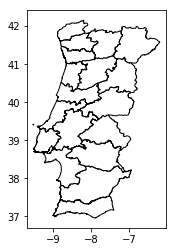

In [92]:
distritos.plot(color='white', edgecolor='black')

In [93]:
print(distritos.crs)


{'init': 'epsg:4326'}


<br>

# 2010

In [94]:
st_hum_10['LATITUDE_N'] = st_hum_10.LATITUDE_N.astype(float)
st_hum_10['LONGITUDE_W'] = st_hum_10.LONGITUDE_W.astype(float)
st_hum_10['Coordinates'] = list(zip(st_hum_10.LONGITUDE_W,st_hum_10.LATITUDE_N))
st_hum_10['Coordinates'] = st_hum_10['Coordinates'].apply(Point)
geo_hum_10 = geopandas.GeoDataFrame(st_hum_10, geometry='Coordinates')

st_tem_10['LATITUDE_N'] = st_tem_10.LATITUDE_N.astype(float)
st_tem_10['LONGITUDE_W'] = st_tem_10.LONGITUDE_W.astype(float)
st_tem_10['Coordinates'] = list(zip(st_tem_10.LONGITUDE_W,st_tem_10.LATITUDE_N))
st_tem_10['Coordinates'] = st_tem_10['Coordinates'].apply(Point)
geo_tem_10 = geopandas.GeoDataFrame(st_tem_10, geometry='Coordinates')

st_pre_10['LATITUDE_N'] = st_pre_10.LATITUDE_N.astype(float)
st_pre_10['LONGITUDE_W'] = st_pre_10.LONGITUDE_W.astype(float)
st_pre_10['Coordinates'] = list(zip(st_pre_10.LONGITUDE_W,st_pre_10.LATITUDE_N))
st_pre_10['Coordinates'] = st_pre_10['Coordinates'].apply(Point)
geo_pre_10 = geopandas.GeoDataFrame(st_pre_10, geometry='Coordinates')

Text(0.5,1,'pre_10')

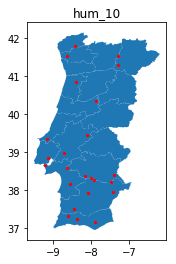

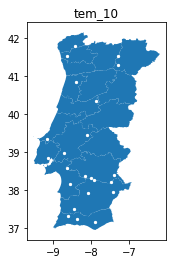

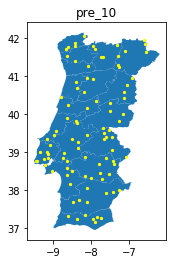

In [95]:
geo_hum_10.plot(ax=distritos.plot(), color='red', markersize=5)
plt.title('hum_10')
geo_tem_10.plot(ax=distritos.plot(), color='white', markersize=5)
plt.title('tem_10')
geo_pre_10.plot(ax=distritos.plot(), color='yellow', markersize=5)
plt.title('pre_10')

In [96]:
circles_geo_hum_10 = geo_hum_10.buffer(0.30)
mp_geo_hum_10 = circles_geo_hum_10.unary_union
holes_geo_hum_10 = distritos['geometry'].intersection(mp_geo_hum_10)
geo_hum_10_with_holes = distritos['geometry'].difference(mp_geo_hum_10)

In [97]:
circles_geo_tem_10 = geo_tem_10.buffer(0.30)
mp_geo_tem_10 = circles_geo_tem_10.unary_union
holes_geo_tem_10 = distritos['geometry'].intersection(mp_geo_tem_10)
geo_tem_10_with_holes = distritos['geometry'].difference(mp_geo_tem_10)

In [98]:
circles_geo_pre_10 = geo_pre_10.buffer(0.30)
mp_geo_pre_10 = circles_geo_pre_10.unary_union
holes_geo_pre_10 = distritos['geometry'].intersection(mp_geo_pre_10)
geo_pre_10_with_holes = distritos['geometry'].difference(mp_geo_pre_10)

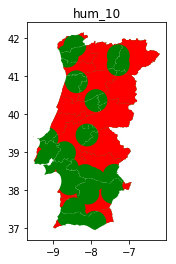

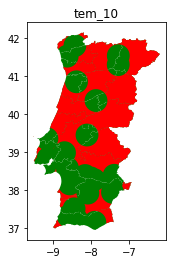

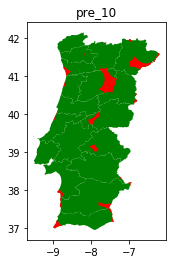

In [99]:
geo_hum_10_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('hum_10')
plt.savefig('/Users/Dino/Desktop/images_year/hum_10.png', bbox_inches='tight')
geo_tem_10_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('tem_10')
plt.savefig('/Users/Dino/Desktop/images_year/tem_10.png', bbox_inches='tight')
geo_pre_10_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('pre_10')
plt.savefig('/Users/Dino/Desktop/images_year/pre_10.png', bbox_inches='tight')

# 2011

In [100]:
st_hum_11['LATITUDE_N'] = st_hum_11.LATITUDE_N.astype(float)
st_hum_11['LONGITUDE_W'] = st_hum_11.LONGITUDE_W.astype(float)
st_hum_11['Coordinates'] = list(zip(st_hum_11.LONGITUDE_W,st_hum_11.LATITUDE_N))
st_hum_11['Coordinates'] = st_hum_11['Coordinates'].apply(Point)
geo_hum_11 = geopandas.GeoDataFrame(st_hum_11, geometry='Coordinates')

st_tem_11['LATITUDE_N'] = st_tem_11.LATITUDE_N.astype(float)
st_tem_11['LONGITUDE_W'] = st_tem_11.LONGITUDE_W.astype(float)
st_tem_11['Coordinates'] = list(zip(st_tem_11.LONGITUDE_W,st_tem_11.LATITUDE_N))
st_tem_11['Coordinates'] = st_tem_11['Coordinates'].apply(Point)
geo_tem_11 = geopandas.GeoDataFrame(st_tem_11, geometry='Coordinates')

st_pre_11['LATITUDE_N'] = st_pre_11.LATITUDE_N.astype(float)
st_pre_11['LONGITUDE_W'] = st_pre_11.LONGITUDE_W.astype(float)
st_pre_11['Coordinates'] = list(zip(st_pre_11.LONGITUDE_W,st_pre_11.LATITUDE_N))
st_pre_11['Coordinates'] = st_pre_11['Coordinates'].apply(Point)
geo_pre_11 = geopandas.GeoDataFrame(st_pre_11, geometry='Coordinates')

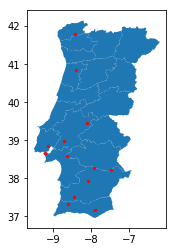

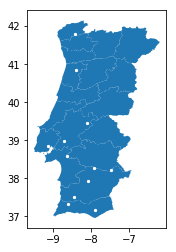

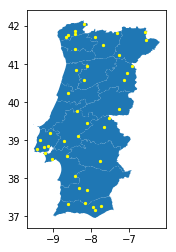

In [101]:
geo_hum_11.plot(ax=distritos.plot(), color='red', markersize=5)
geo_tem_11.plot(ax=distritos.plot(), color='white', markersize=5)
geo_pre_11.plot(ax=distritos.plot(), color='yellow', markersize=5)

In [102]:
circles_geo_hum_11 = geo_hum_11.buffer(0.30)
mp_geo_hum_11 = circles_geo_hum_11.unary_union
holes_geo_hum_11 = distritos['geometry'].intersection(mp_geo_hum_11)
geo_hum_11_with_holes = distritos['geometry'].difference(mp_geo_hum_11)

In [103]:
circles_geo_tem_11 = geo_tem_11.buffer(0.30)
mp_geo_tem_11 = circles_geo_tem_11.unary_union
holes_geo_tem_11 = distritos['geometry'].intersection(mp_geo_tem_11)
geo_tem_11_with_holes = distritos['geometry'].difference(mp_geo_tem_11)

In [104]:
circles_geo_pre_11 = geo_pre_11.buffer(0.30)
mp_geo_pre_11 = circles_geo_pre_11.unary_union
holes_geo_pre_11 = distritos['geometry'].intersection(mp_geo_pre_11)
geo_pre_11_with_holes = distritos['geometry'].difference(mp_geo_pre_11)

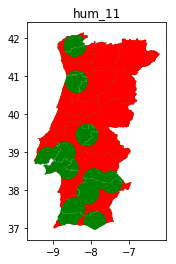

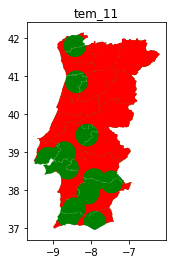

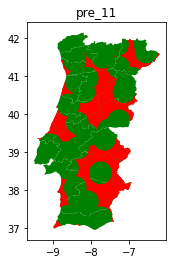

In [105]:
geo_hum_11_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('hum_11')
plt.savefig('/Users/Dino/Desktop/images_year/hum_11.png', bbox_inches='tight')
geo_tem_11_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('tem_11')
plt.savefig('/Users/Dino/Desktop/images_year/tem_11.png', bbox_inches='tight')
geo_pre_11_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('pre_11')
plt.savefig('/Users/Dino/Desktop/images_year/pre_11.png', bbox_inches='tight')

# 2012

In [106]:
st_hum_12['LATITUDE_N'] = st_hum_12.LATITUDE_N.astype(float)
st_hum_12['LONGITUDE_W'] = st_hum_12.LONGITUDE_W.astype(float)
st_hum_12['Coordinates'] = list(zip(st_hum_12.LONGITUDE_W,st_hum_12.LATITUDE_N))
st_hum_12['Coordinates'] = st_hum_12['Coordinates'].apply(Point)
geo_hum_12 = geopandas.GeoDataFrame(st_hum_12, geometry='Coordinates')

st_tem_12['LATITUDE_N'] = st_tem_12.LATITUDE_N.astype(float)
st_tem_12['LONGITUDE_W'] = st_tem_12.LONGITUDE_W.astype(float)
st_tem_12['Coordinates'] = list(zip(st_tem_12.LONGITUDE_W,st_tem_12.LATITUDE_N))
st_tem_12['Coordinates'] = st_tem_12['Coordinates'].apply(Point)
geo_tem_12 = geopandas.GeoDataFrame(st_tem_12, geometry='Coordinates')

st_pre_12['LATITUDE_N'] = st_pre_12.LATITUDE_N.astype(float)
st_pre_12['LONGITUDE_W'] = st_pre_12.LONGITUDE_W.astype(float)
st_pre_12['Coordinates'] = list(zip(st_pre_12.LONGITUDE_W,st_pre_12.LATITUDE_N))
st_pre_12['Coordinates'] = st_pre_12['Coordinates'].apply(Point)
geo_pre_12 = geopandas.GeoDataFrame(st_pre_12, geometry='Coordinates')

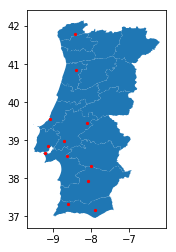

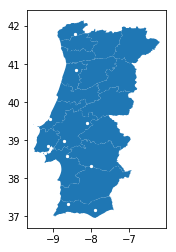

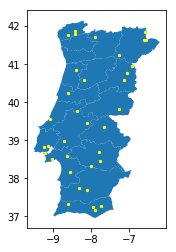

In [107]:
geo_hum_12.plot(ax=distritos.plot(), color='red', markersize=5)
geo_tem_12.plot(ax=distritos.plot(), color='white', markersize=5)
geo_pre_12.plot(ax=distritos.plot(), color='yellow', markersize=5)

In [108]:
circles_geo_hum_12 = geo_hum_12.buffer(0.30)
mp_geo_hum_12 = circles_geo_hum_12.unary_union
holes_geo_hum_12 = distritos['geometry'].intersection(mp_geo_hum_12)
geo_hum_12_with_holes = distritos['geometry'].difference(mp_geo_hum_12)

In [109]:
circles_geo_tem_12 = geo_tem_12.buffer(0.30)
mp_geo_tem_12 = circles_geo_tem_12.unary_union
holes_geo_tem_12 = distritos['geometry'].intersection(mp_geo_tem_12)
geo_tem_12_with_holes = distritos['geometry'].difference(mp_geo_tem_12)

In [110]:
circles_geo_pre_12 = geo_pre_12.buffer(0.30)
mp_geo_pre_12 = circles_geo_pre_12.unary_union
holes_geo_pre_12 = distritos['geometry'].intersection(mp_geo_pre_12)
geo_pre_12_with_holes = distritos['geometry'].difference(mp_geo_pre_12)

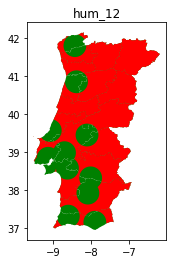

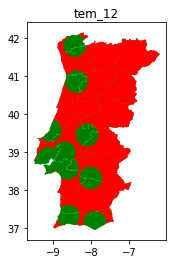

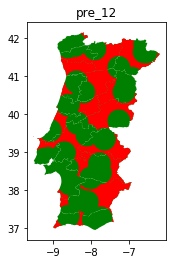

In [111]:
geo_hum_12_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('hum_12')
plt.savefig('/Users/Dino/Desktop/images_year/hum_12.png', bbox_inches='tight')
geo_tem_12_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('tem_12')
plt.savefig('/Users/Dino/Desktop/images_year/tem_12.png', bbox_inches='tight')
geo_pre_12_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('pre_12')
plt.savefig('/Users/Dino/Desktop/images_year/pre_12.png', bbox_inches='tight')

# 2013

In [112]:
st_hum_13['LATITUDE_N'] = st_hum_13.LATITUDE_N.astype(float)
st_hum_13['LONGITUDE_W'] = st_hum_13.LONGITUDE_W.astype(float)
st_hum_13['Coordinates'] = list(zip(st_hum_13.LONGITUDE_W,st_hum_13.LATITUDE_N))
st_hum_13['Coordinates'] = st_hum_13['Coordinates'].apply(Point)
geo_hum_13 = geopandas.GeoDataFrame(st_hum_13, geometry='Coordinates')

st_tem_13['LATITUDE_N'] = st_tem_13.LATITUDE_N.astype(float)
st_tem_13['LONGITUDE_W'] = st_tem_13.LONGITUDE_W.astype(float)
st_tem_13['Coordinates'] = list(zip(st_tem_13.LONGITUDE_W,st_tem_13.LATITUDE_N))
st_tem_13['Coordinates'] = st_tem_13['Coordinates'].apply(Point)
geo_tem_13 = geopandas.GeoDataFrame(st_tem_13, geometry='Coordinates')

st_pre_13['LATITUDE_N'] = st_pre_13.LATITUDE_N.astype(float)
st_pre_13['LONGITUDE_W'] = st_pre_13.LONGITUDE_W.astype(float)
st_pre_13['Coordinates'] = list(zip(st_pre_13.LONGITUDE_W,st_pre_13.LATITUDE_N))
st_pre_13['Coordinates'] = st_pre_13['Coordinates'].apply(Point)
geo_pre_13 = geopandas.GeoDataFrame(st_pre_13, geometry='Coordinates')

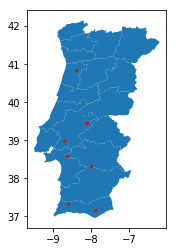

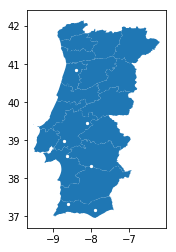

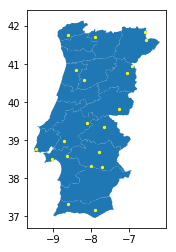

In [113]:
geo_hum_13.plot(ax=distritos.plot(), color='red', markersize=5)
geo_tem_13.plot(ax=distritos.plot(), color='white', markersize=5)
geo_pre_13.plot(ax=distritos.plot(), color='yellow', markersize=5)

In [114]:
circles_geo_hum_13 = geo_hum_13.buffer(0.30)
mp_geo_hum_13 = circles_geo_hum_13.unary_union
holes_geo_hum_13 = distritos['geometry'].intersection(mp_geo_hum_13)
geo_hum_13_with_holes = distritos['geometry'].difference(mp_geo_hum_13)

In [115]:
circles_geo_tem_13 = geo_tem_13.buffer(0.30)
mp_geo_tem_13 = circles_geo_tem_13.unary_union
holes_geo_tem_13 = distritos['geometry'].intersection(mp_geo_tem_13)
geo_tem_13_with_holes = distritos['geometry'].difference(mp_geo_tem_13)

In [116]:
circles_geo_pre_13 = geo_pre_13.buffer(0.30)
mp_geo_pre_13 = circles_geo_pre_13.unary_union
holes_geo_pre_13 = distritos['geometry'].intersection(mp_geo_pre_13)
geo_pre_13_with_holes = distritos['geometry'].difference(mp_geo_pre_13)

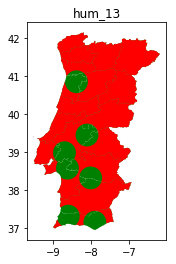

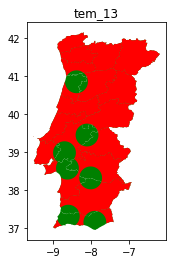

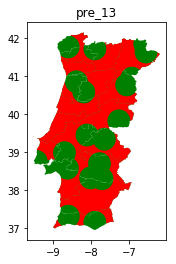

In [117]:
geo_hum_13_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('hum_13')
plt.savefig('/Users/Dino/Desktop/images_year/hum_13.png', bbox_inches='tight')
geo_tem_13_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('tem_13')
plt.savefig('/Users/Dino/Desktop/images_year/tem_13.png', bbox_inches='tight')
geo_pre_13_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('pre_13')
plt.savefig('/Users/Dino/Desktop/images_year/pre_13.png', bbox_inches='tight')

# 2014

In [118]:
st_hum_14['LATITUDE_N'] = st_hum_14.LATITUDE_N.astype(float)
st_hum_14['LONGITUDE_W'] = st_hum_14.LONGITUDE_W.astype(float)
st_hum_14['Coordinates'] = list(zip(st_hum_14.LONGITUDE_W,st_hum_14.LATITUDE_N))
st_hum_14['Coordinates'] = st_hum_14['Coordinates'].apply(Point)
geo_hum_14 = geopandas.GeoDataFrame(st_hum_14, geometry='Coordinates')

st_tem_14['LATITUDE_N'] = st_tem_14.LATITUDE_N.astype(float)
st_tem_14['LONGITUDE_W'] = st_tem_14.LONGITUDE_W.astype(float)
st_tem_14['Coordinates'] = list(zip(st_tem_14.LONGITUDE_W,st_tem_14.LATITUDE_N))
st_tem_14['Coordinates'] = st_tem_14['Coordinates'].apply(Point)
geo_tem_14 = geopandas.GeoDataFrame(st_tem_14, geometry='Coordinates')

st_pre_14['LATITUDE_N'] = st_pre_14.LATITUDE_N.astype(float)
st_pre_14['LONGITUDE_W'] = st_pre_14.LONGITUDE_W.astype(float)
st_pre_14['Coordinates'] = list(zip(st_pre_14.LONGITUDE_W,st_pre_14.LATITUDE_N))
st_pre_14['Coordinates'] = st_pre_14['Coordinates'].apply(Point)
geo_pre_14 = geopandas.GeoDataFrame(st_pre_14, geometry='Coordinates')

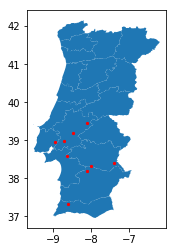

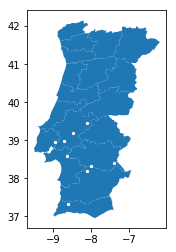

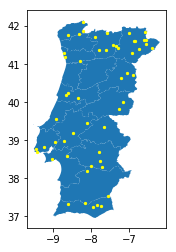

In [119]:
geo_hum_14.plot(ax=distritos.plot(), color='red', markersize=5)
geo_tem_14.plot(ax=distritos.plot(), color='white', markersize=5)
geo_pre_14.plot(ax=distritos.plot(), color='yellow', markersize=5)

In [120]:
circles_geo_hum_14 = geo_hum_14.buffer(0.30)
mp_geo_hum_14 = circles_geo_hum_14.unary_union
holes_geo_hum_14 = distritos['geometry'].intersection(mp_geo_hum_14)
geo_hum_14_with_holes = distritos['geometry'].difference(mp_geo_hum_14)

In [121]:
circles_geo_tem_14 = geo_tem_14.buffer(0.30)
mp_geo_tem_14 = circles_geo_tem_14.unary_union
holes_geo_tem_14 = distritos['geometry'].intersection(mp_geo_tem_14)
geo_tem_14_with_holes = distritos['geometry'].difference(mp_geo_tem_14)

In [122]:
circles_geo_pre_14 = geo_pre_14.buffer(0.30)
mp_geo_pre_14 = circles_geo_pre_14.unary_union
holes_geo_pre_14 = distritos['geometry'].intersection(mp_geo_pre_14)
geo_pre_14_with_holes = distritos['geometry'].difference(mp_geo_pre_14)

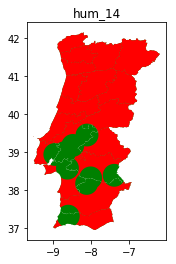

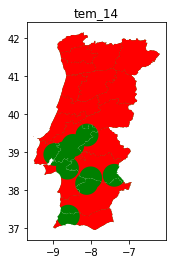

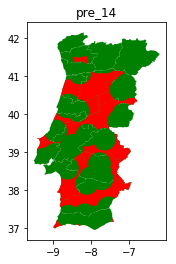

In [123]:
geo_hum_14_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('hum_14')
plt.savefig('/Users/Dino/Desktop/images_year/hum_14.png', bbox_inches='tight')
geo_tem_14_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('tem_14')
plt.savefig('/Users/Dino/Desktop/images_year/tem_14.png', bbox_inches='tight')
geo_pre_14_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('pre_14')
plt.savefig('/Users/Dino/Desktop/images_year/pre_14.png', bbox_inches='tight')

# 2015

In [124]:
st_hum_15['LATITUDE_N'] = st_hum_15.LATITUDE_N.astype(float)
st_hum_15['LONGITUDE_W'] = st_hum_15.LONGITUDE_W.astype(float)
st_hum_15['Coordinates'] = list(zip(st_hum_15.LONGITUDE_W,st_hum_15.LATITUDE_N))
st_hum_15['Coordinates'] = st_hum_15['Coordinates'].apply(Point)
geo_hum_15 = geopandas.GeoDataFrame(st_hum_15, geometry='Coordinates')

st_tem_15['LATITUDE_N'] = st_tem_15.LATITUDE_N.astype(float)
st_tem_15['LONGITUDE_W'] = st_tem_15.LONGITUDE_W.astype(float)
st_tem_15['Coordinates'] = list(zip(st_tem_15.LONGITUDE_W,st_tem_15.LATITUDE_N))
st_tem_15['Coordinates'] = st_tem_15['Coordinates'].apply(Point)
geo_tem_15 = geopandas.GeoDataFrame(st_tem_15, geometry='Coordinates')

st_pre_15['LATITUDE_N'] = st_pre_15.LATITUDE_N.astype(float)
st_pre_15['LONGITUDE_W'] = st_pre_15.LONGITUDE_W.astype(float)
st_pre_15['Coordinates'] = list(zip(st_pre_15.LONGITUDE_W,st_pre_15.LATITUDE_N))
st_pre_15['Coordinates'] = st_pre_15['Coordinates'].apply(Point)
geo_pre_15 = geopandas.GeoDataFrame(st_pre_15, geometry='Coordinates')

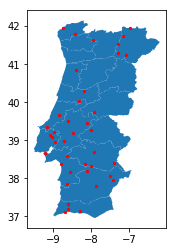

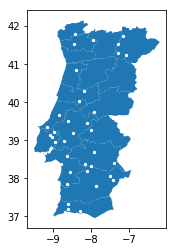

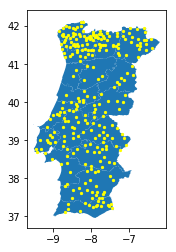

In [125]:
geo_hum_15.plot(ax=distritos.plot(), color='red', markersize=5)
geo_tem_15.plot(ax=distritos.plot(), color='white', markersize=5)
geo_pre_15.plot(ax=distritos.plot(), color='yellow', markersize=5)

In [126]:
circles_geo_hum_15 = geo_hum_15.buffer(0.30)
mp_geo_hum_15 = circles_geo_hum_15.unary_union
holes_geo_hum_15 = distritos['geometry'].intersection(mp_geo_hum_15)
geo_hum_15_with_holes = distritos['geometry'].difference(mp_geo_hum_15)

In [127]:
circles_geo_tem_15 = geo_tem_15.buffer(0.30)
mp_geo_tem_15 = circles_geo_tem_15.unary_union
holes_geo_tem_15 = distritos['geometry'].intersection(mp_geo_tem_15)
geo_tem_15_with_holes = distritos['geometry'].difference(mp_geo_tem_15)

In [128]:
circles_geo_pre_15 = geo_pre_15.buffer(0.30)
mp_geo_pre_15 = circles_geo_pre_15.unary_union
holes_geo_pre_15 = distritos['geometry'].intersection(mp_geo_pre_15)
geo_pre_15_with_holes = distritos['geometry'].difference(mp_geo_pre_15)

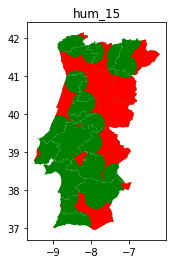

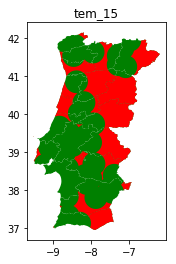

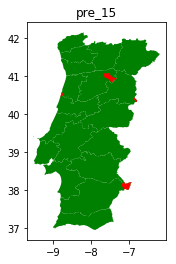

In [129]:
geo_hum_15_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('hum_15')
plt.savefig('/Users/Dino/Desktop/images_year/hum_15.png', bbox_inches='tight')
geo_tem_15_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('tem_15')
plt.savefig('/Users/Dino/Desktop/images_year/tem_15.png', bbox_inches='tight')
geo_pre_15_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('pre_15')
plt.savefig('/Users/Dino/Desktop/images_year/pre_15.png', bbox_inches='tight')

# 2016

In [130]:
st_hum_16['LATITUDE_N'] = st_hum_16.LATITUDE_N.astype(float)
st_hum_16['LONGITUDE_W'] = st_hum_16.LONGITUDE_W.astype(float)
st_hum_16['Coordinates'] = list(zip(st_hum_16.LONGITUDE_W,st_hum_16.LATITUDE_N))
st_hum_16['Coordinates'] = st_hum_16['Coordinates'].apply(Point)
geo_hum_16 = geopandas.GeoDataFrame(st_hum_16, geometry='Coordinates')

st_tem_16['LATITUDE_N'] = st_tem_16.LATITUDE_N.astype(float)
st_tem_16['LONGITUDE_W'] = st_tem_16.LONGITUDE_W.astype(float)
st_tem_16['Coordinates'] = list(zip(st_tem_16.LONGITUDE_W,st_tem_16.LATITUDE_N))
st_tem_16['Coordinates'] = st_tem_16['Coordinates'].apply(Point)
geo_tem_16 = geopandas.GeoDataFrame(st_tem_16, geometry='Coordinates')

st_pre_16['LATITUDE_N'] = st_pre_16.LATITUDE_N.astype(float)
st_pre_16['LONGITUDE_W'] = st_pre_16.LONGITUDE_W.astype(float)
st_pre_16['Coordinates'] = list(zip(st_pre_16.LONGITUDE_W,st_pre_16.LATITUDE_N))
st_pre_16['Coordinates'] = st_pre_16['Coordinates'].apply(Point)
geo_pre_16 = geopandas.GeoDataFrame(st_pre_16, geometry='Coordinates')

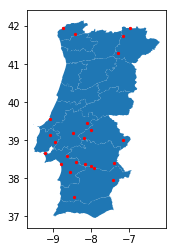

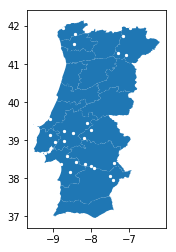

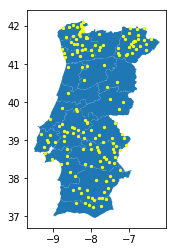

In [131]:
geo_hum_16.plot(ax=distritos.plot(), color='red', markersize=5)
geo_tem_16.plot(ax=distritos.plot(), color='white', markersize=5)
geo_pre_16.plot(ax=distritos.plot(), color='yellow', markersize=5)

In [132]:
circles_geo_hum_16 = geo_hum_16.buffer(0.30)
mp_geo_hum_16 = circles_geo_hum_16.unary_union
holes_geo_hum_16 = distritos['geometry'].intersection(mp_geo_hum_16)
geo_hum_16_with_holes = distritos['geometry'].difference(mp_geo_hum_16)

In [133]:
circles_geo_tem_16 = geo_tem_16.buffer(0.30)
mp_geo_tem_16 = circles_geo_tem_16.unary_union
holes_geo_tem_16 = distritos['geometry'].intersection(mp_geo_tem_16)
geo_tem_16_with_holes = distritos['geometry'].difference(mp_geo_tem_16)

In [134]:
circles_geo_pre_16 = geo_pre_16.buffer(0.30)
mp_geo_pre_16 = circles_geo_pre_16.unary_union
holes_geo_pre_16 = distritos['geometry'].intersection(mp_geo_pre_16)
geo_pre_16_with_holes = distritos['geometry'].difference(mp_geo_pre_16)

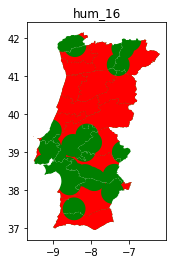

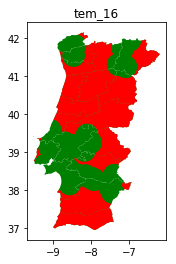

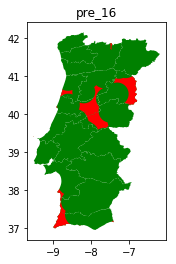

In [135]:
geo_hum_16_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('hum_16')
plt.savefig('/Users/Dino/Desktop/images_year/hum_16.png', bbox_inches='tight')
geo_tem_16_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('tem_16')
plt.savefig('/Users/Dino/Desktop/images_year/tem_16.png', bbox_inches='tight')
geo_pre_16_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('pre_16')
plt.savefig('/Users/Dino/Desktop/images_year/pre_16.png', bbox_inches='tight')

# 2017

In [136]:
st_hum_17['LATITUDE_N'] = st_hum_17.LATITUDE_N.astype(float)
st_hum_17['LONGITUDE_W'] = st_hum_17.LONGITUDE_W.astype(float)
st_hum_17['Coordinates'] = list(zip(st_hum_17.LONGITUDE_W,st_hum_17.LATITUDE_N))
st_hum_17['Coordinates'] = st_hum_17['Coordinates'].apply(Point)
geo_hum_17 = geopandas.GeoDataFrame(st_hum_17, geometry='Coordinates')

st_tem_17['LATITUDE_N'] = st_tem_17.LATITUDE_N.astype(float)
st_tem_17['LONGITUDE_W'] = st_tem_17.LONGITUDE_W.astype(float)
st_tem_17['Coordinates'] = list(zip(st_tem_17.LONGITUDE_W,st_tem_17.LATITUDE_N))
st_tem_17['Coordinates'] = st_tem_17['Coordinates'].apply(Point)
geo_tem_17 = geopandas.GeoDataFrame(st_tem_17, geometry='Coordinates')

st_pre_17['LATITUDE_N'] = st_pre_17.LATITUDE_N.astype(float)
st_pre_17['LONGITUDE_W'] = st_pre_17.LONGITUDE_W.astype(float)
st_pre_17['Coordinates'] = list(zip(st_pre_17.LONGITUDE_W,st_pre_17.LATITUDE_N))
st_pre_17['Coordinates'] = st_pre_17['Coordinates'].apply(Point)
geo_pre_17 = geopandas.GeoDataFrame(st_pre_17, geometry='Coordinates')

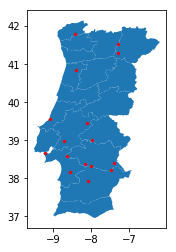

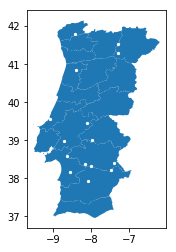

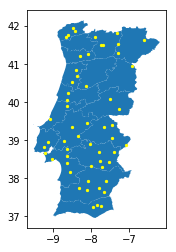

In [137]:
geo_hum_17.plot(ax=distritos.plot(), color='red', markersize=5)
geo_tem_17.plot(ax=distritos.plot(), color='white', markersize=5)
geo_pre_17.plot(ax=distritos.plot(), color='yellow', markersize=5)

In [138]:
circles_geo_hum_17 = geo_hum_17.buffer(0.30)
mp_geo_hum_17 = circles_geo_hum_17.unary_union
holes_geo_hum_17 = distritos['geometry'].intersection(mp_geo_hum_17)
geo_hum_17_with_holes = distritos['geometry'].difference(mp_geo_hum_17)

In [139]:
circles_geo_tem_17 = geo_tem_17.buffer(0.30)
mp_geo_tem_17 = circles_geo_tem_17.unary_union
holes_geo_tem_17 = distritos['geometry'].intersection(mp_geo_tem_17)
geo_tem_17_with_holes = distritos['geometry'].difference(mp_geo_tem_17)

In [140]:
circles_geo_pre_17 = geo_pre_17.buffer(0.30)
mp_geo_pre_17 = circles_geo_pre_17.unary_union
holes_geo_pre_17 = distritos['geometry'].intersection(mp_geo_pre_17)
geo_pre_17_with_holes = distritos['geometry'].difference(mp_geo_pre_17)

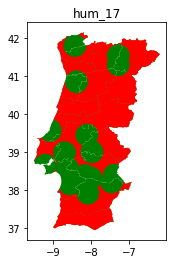

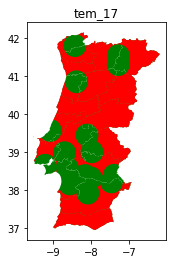

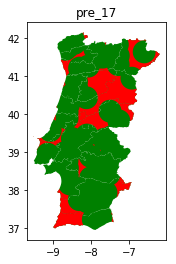

In [141]:
geo_hum_17_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('hum_17')
plt.savefig('/Users/Dino/Desktop/images_year/hum_17.png', bbox_inches='tight')
geo_tem_17_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('tem_17')
plt.savefig('/Users/Dino/Desktop/images_year/tem_17.png', bbox_inches='tight')
geo_pre_17_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('pre_17')
plt.savefig('/Users/Dino/Desktop/images_year/pre_17.png', bbox_inches='tight')

# 2018

In [142]:
st_hum_18['LATITUDE_N'] = st_hum_18.LATITUDE_N.astype(float)
st_hum_18['LONGITUDE_W'] = st_hum_18.LONGITUDE_W.astype(float)
st_hum_18['Coordinates'] = list(zip(st_hum_18.LONGITUDE_W,st_hum_18.LATITUDE_N))
st_hum_18['Coordinates'] = st_hum_18['Coordinates'].apply(Point)
geo_hum_18 = geopandas.GeoDataFrame(st_hum_18, geometry='Coordinates')

st_tem_18['LATITUDE_N'] = st_tem_18.LATITUDE_N.astype(float)
st_tem_18['LONGITUDE_W'] = st_tem_18.LONGITUDE_W.astype(float)
st_tem_18['Coordinates'] = list(zip(st_tem_18.LONGITUDE_W,st_tem_18.LATITUDE_N))
st_tem_18['Coordinates'] = st_tem_18['Coordinates'].apply(Point)
geo_tem_18 = geopandas.GeoDataFrame(st_tem_18, geometry='Coordinates')

st_pre_18['LATITUDE_N'] = st_pre_18.LATITUDE_N.astype(float)
st_pre_18['LONGITUDE_W'] = st_pre_18.LONGITUDE_W.astype(float)
st_pre_18['Coordinates'] = list(zip(st_pre_18.LONGITUDE_W,st_pre_18.LATITUDE_N))
st_pre_18['Coordinates'] = st_pre_18['Coordinates'].apply(Point)
geo_pre_18 = geopandas.GeoDataFrame(st_pre_18, geometry='Coordinates')

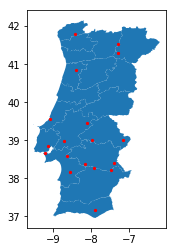

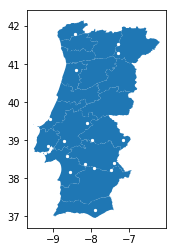

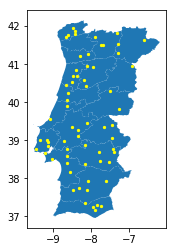

In [143]:
geo_hum_18.plot(ax=distritos.plot(), color='red', markersize=5)
geo_tem_18.plot(ax=distritos.plot(), color='white', markersize=5)
geo_pre_18.plot(ax=distritos.plot(), color='yellow', markersize=5)

In [144]:
circles_geo_hum_18 = geo_hum_18.buffer(0.30)
mp_geo_hum_18 = circles_geo_hum_18.unary_union
holes_geo_hum_18 = distritos['geometry'].intersection(mp_geo_hum_18)
geo_hum_18_with_holes = distritos['geometry'].difference(mp_geo_hum_18)

In [145]:
circles_geo_tem_18 = geo_tem_18.buffer(0.30)
mp_geo_tem_18 = circles_geo_tem_18.unary_union
holes_geo_tem_18 = distritos['geometry'].intersection(mp_geo_tem_18)
geo_tem_18_with_holes = distritos['geometry'].difference(mp_geo_tem_18)

In [146]:
circles_geo_pre_18 = geo_pre_18.buffer(0.30)
mp_geo_pre_18 = circles_geo_pre_18.unary_union
holes_geo_pre_18 = distritos['geometry'].intersection(mp_geo_pre_18)
geo_pre_18_with_holes = distritos['geometry'].difference(mp_geo_pre_18)

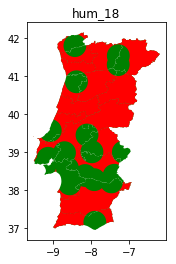

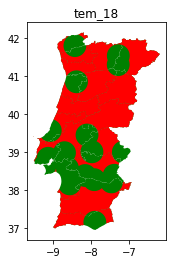

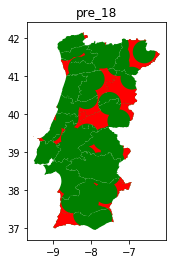

In [147]:
geo_hum_18_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('hum_18')
plt.savefig('/Users/Dino/Desktop/images_year/hum_18.png', bbox_inches='tight')
geo_tem_18_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('tem_18')
plt.savefig('/Users/Dino/Desktop/images_year/tem_18.png', bbox_inches='tight')
geo_pre_18_with_holes.plot(ax=distritos.plot( color='green'),color='red')
plt.title('pre_18')
plt.savefig('/Users/Dino/Desktop/images_year/pre_18.png', bbox_inches='tight')